In [1]:
#importing necessary libraries.
import pandas as pd 
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data import
data = pd.read_csv('Data_set 2.csv')
data

,gender,age,Investment_Avenues,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold,...,Duration,Invest_Monitor,Expect,Avenue,What are your savings objectives?,Reason_Equity,Reason_Mutual,Reason_Bonds,Reason_FD,Source
0,Female,34,Yes,1,2,5,3,7,6,4,...,1-3 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Fixed Returns,Newspapers and Magazines
1,Female,23,Yes,4,3,2,1,5,6,7,...,More than 5 years,Weekly,20%-30%,Mutual Fund,Health Care,Dividend,Better Returns,Safe Investment,High Interest Rates,Financial Consultants
2,Male,30,Yes,3,6,4,2,5,1,7,...,3-5 years,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Tax Benefits,Assured Returns,Fixed Returns,Television
3,Male,22,Yes,2,1,3,7,6,4,5,...,Less than 1 year,Daily,10%-20%,Equity,Retirement Plan,Dividend,Fund Diversification,Tax Incentives,High Interest Rates,Internet
4,Female,24,No,2,1,3,6,4,5,7,...,Less than 1 year,Daily,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Safe Investment,Risk Free,Internet
5,Female,24,No,7,5,4,6,3,1,2,...,1-3 years,Daily,30%-40%,Mutual Fund,Retirement Plan,Liquidity,Fund Diversification,Safe Investment,Risk Free,Internet
6,Female,27,Yes,3,6,4,2,5,1,7,...,3-5 years,Monthly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,High Interest Rates,Financial Consultants
7,Male,21,Yes,2,3,7,4,6,1,5,...,3-5 years,Monthly,20%-30%,Mutual Fund,Retirement Plan,Capital Appreciation,Better Returns,Assured Returns,Risk Free,Newspapers and Magazines
8,Male,35,Yes,2,4,7,5,3,1,6,...,1-3 years,Weekly,20%-30%,Equity,Retirement Plan,Capital Appreciation,Fund Diversification,Safe Investment,Fixed Returns,Television
9,Male,31,Yes,1,3,7,4,5,2,6,...,3-5 years,Monthly,30%-40%,Fixed Deposits,Retirement Plan,Capital Appreciation,Fund Diversification,Assured Returns,Fixed Returns,Newspapers and Magazines


In [3]:
# Data Overview

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   gender                             40 non-null     object
 1   age                                40 non-null     int64 
 2   Investment_Avenues                 40 non-null     object
 3   Mutual_Funds                       40 non-null     int64 
 4   Equity_Market                      40 non-null     int64 
 5   Debentures                         40 non-null     int64 
 6   Government_Bonds                   40 non-null     int64 
 7   Fixed_Deposits                     40 non-null     int64 
 8   PPF                                40 non-null     int64 
 9   Gold                               40 non-null     int64 
 10  Stock_Marktet                      40 non-null     object
 11  Factor                             40 non-null     object
 12  Objective 

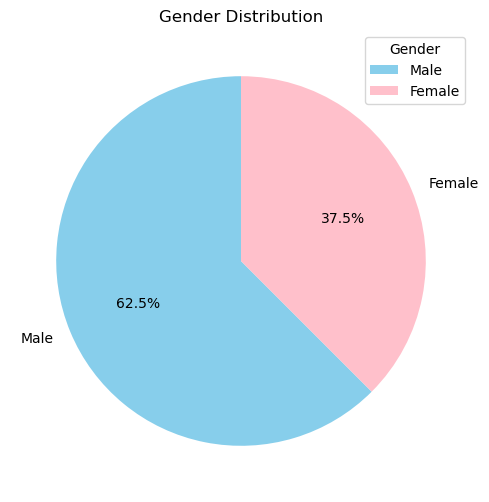

In [4]:
gender = data["gender"].value_counts()
gender

plt.figure(figsize=(6,6)) 
plt.pie(gender, labels=gender.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'pink'])
plt.title('Gender Distribution')
plt.legend(title="Gender", loc="upper right")
plt.show()

In [5]:
# Descriptive statistics
data.describe()

,age,Mutual_Funds,Equity_Market,Debentures,Government_Bonds,Fixed_Deposits,PPF,Gold
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,27.800000,2.550000,3.475000,5.750000,4.650000,3.575000,2.025000,5.975000
std,3.560467,1.197219,1.131994,1.675617,1.369072,1.795828,1.609069,1.143263
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,25.750000,2.000000,3.000000,5.000000,4.000000,2.750000,1.000000,6.000000
50%,27.000000,2.000000,4.000000,6.500000,5.000000,3.500000,1.000000,6.000000
75%,30.000000,3.000000,4.000000,7.000000,5.000000,5.000000,2.250000,7.000000
max,35.000000,7.000000,6.000000,7.000000,7.000000,7.000000,6.000000,7.000000


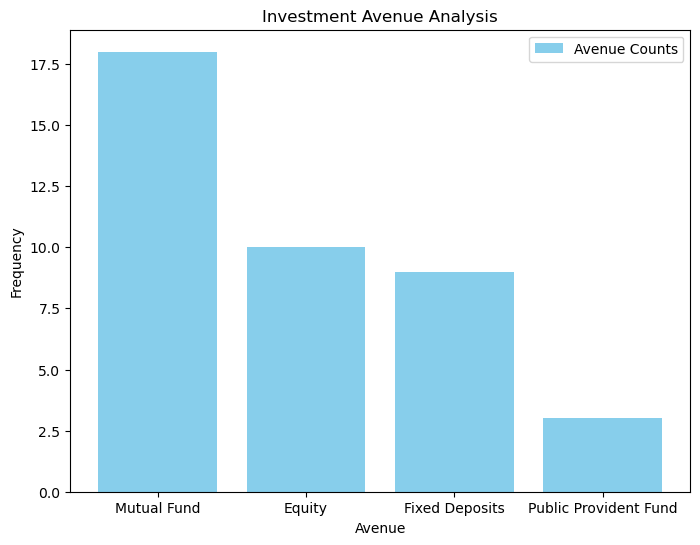

In [6]:
# Visualizing the most preferred Investment Avenue
inv_ave = data['Avenue'].value_counts()
plt.figure(figsize=(8,6))
plt.bar(inv_ave.index, inv_ave.values, color='skyblue') 

plt.title('Investment Avenue Analysis')
plt.xlabel('Avenue')
plt.ylabel('Frequency')

plt.legend(["Avenue Counts"], loc="upper right")
plt.show()


Summary of Common Investment Reasons:
Appreciation: 32 mentions
Low_Risk: 39 mentions
Other_Reasons: 16 mentions


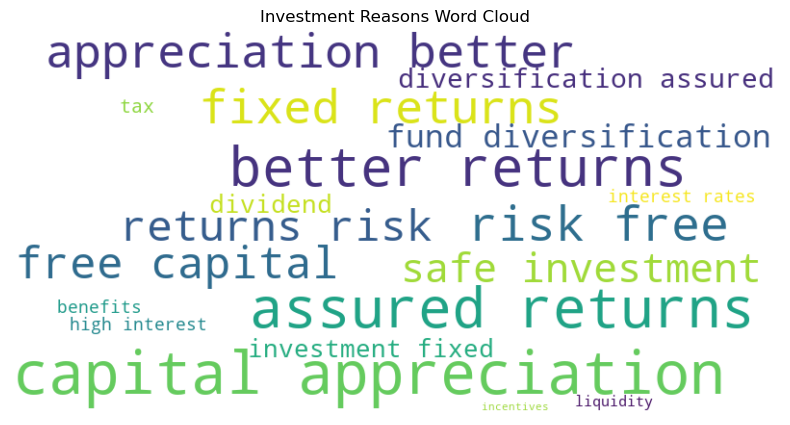

In [7]:
# Investment Reasons Analysis
data['All_Reasons'] = data[['Reason_Equity', 'Reason_Mutual', 'Reason_Bonds', 'Reason_FD']].astype(str).agg(' '.join, axis=1)

# Cleaning the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.replace('none', '')  # Remove 'None' (from NaN conversions)
    return text.strip()
data['Cleaned_Reasons'] = data['All_Reasons'].apply(clean_text)

# Tokenizing and Counting Word Frequencies
all_words = ' '.join(data['Cleaned_Reasons']).split()
word_counts = Counter(all_words)

# Identifying Common Themes
themes = {"Appreciation": ["capital appreciation","Dividend","high interest rates"],
          "Low_Risk": ["risk free", "assured returns","safe investment","fixed returns"],
          "Other_Reasons": ["fund diversification","tax benefits"]
}

summary = {theme: 0 for theme in themes}

for reason in data['Cleaned_Reasons']:
    for theme, keywords in themes.items():
        if any(keyword in reason for keyword in keywords):
            summary[theme] += 1

print("\nSummary of Common Investment Reasons:")
for theme, count in summary.items():
    print(f"{theme}: {count} mentions")
# Generate Word Cloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Investment Reasons Word Cloud")
plt.show()

Top 10 most common words: [('retirement', 24), ('plan', 24), ('health', 13), ('care', 13), ('education', 3)]


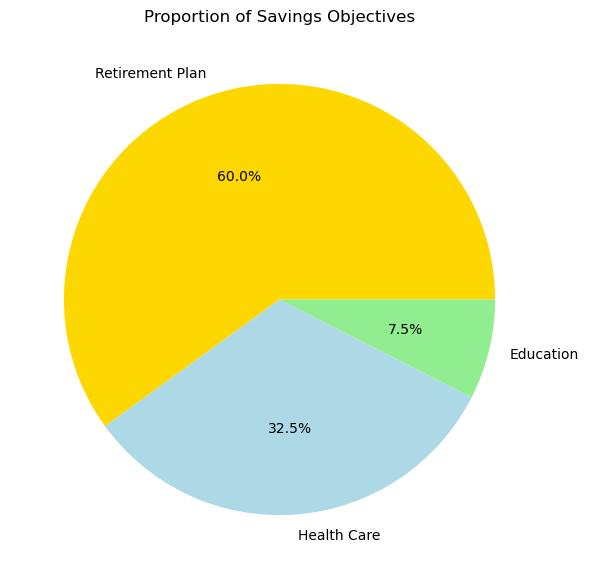

In [8]:
# Analysis of Saving Objectives

data = data.dropna(subset=['What are your savings objectives?'])

# Step 2: Clean the text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text.strip()

data['Cleaned_Objectives'] = data['What are your savings objectives?'].apply(clean_text)

# Step 3: Count word frequencies
all_words = ' '.join(data['Cleaned_Objectives']).split()
word_counts = Counter(all_words)

# Step 4: Identify Common Objectives
common_words = word_counts.most_common(10)
print("Top 10 most common words:", common_words)

# Step 5: Generate Pie chart for categorized savings objective
sav_obj = data['What are your savings objectives?'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(sav_obj, labels=sav_obj.index, autopct='%1.1f%%', colors=['gold', 'lightblue', 'lightgreen', 'pink', 'orange', 'purple'])
plt.title("Proportion of Savings Objectives")
plt.show()

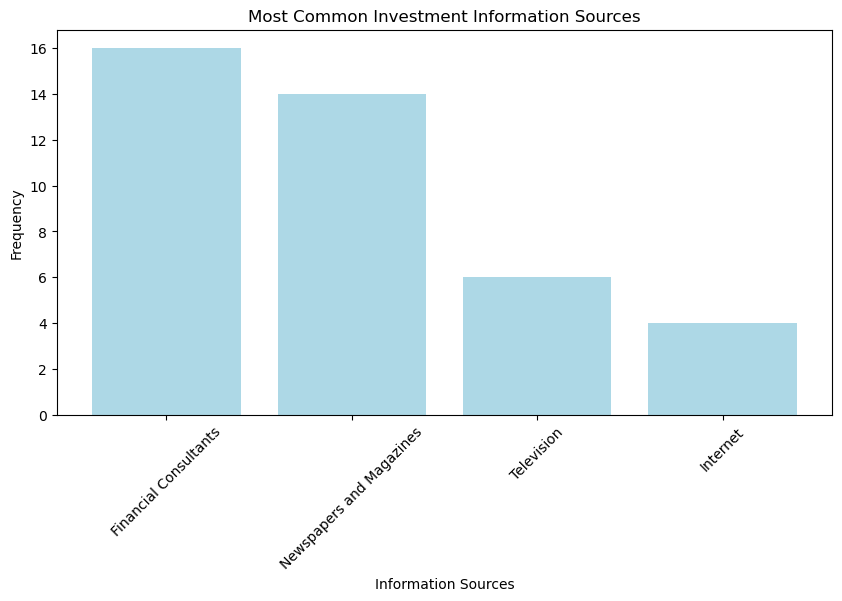

In [9]:
# Common Information sources
info_source=data['Source'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(info_source.index, info_source.values, color='lightblue')
plt.xlabel("Information Sources")
plt.ylabel("Frequency")
plt.title("Most Common Investment Information Sources")
plt.xticks(rotation=45)
plt.show()

In [10]:
# Average Investment Duration

# Step 1: Define a mapping of text durations to numeric values (using midpoints)
duration_mapping = {
    "Less than 1 year": 0.5,   # Approximate midpoint
    "1-3 years": 2,            # Midpoint of 1 and 3
    "3-5 years": 4,            # Midpoint of 3 and 5
    "More than 5 years": 6      # Assuming 6 as a conservative estimate
}

# Step 2: Convert text to numbers
data["Investment_Duration_Numeric"] = data["Duration"].map(duration_mapping)

# Step 3: Calculate the average investment duration
average_duration = data["Investment_Duration_Numeric"].mean()

print(f"Average Investment Duration: {average_duration:.2f} years")

Average Investment Duration: 2.98 years


Expect
20%-30%    32
30%-40%     5
10%-20%     3
Name: count, dtype: int64


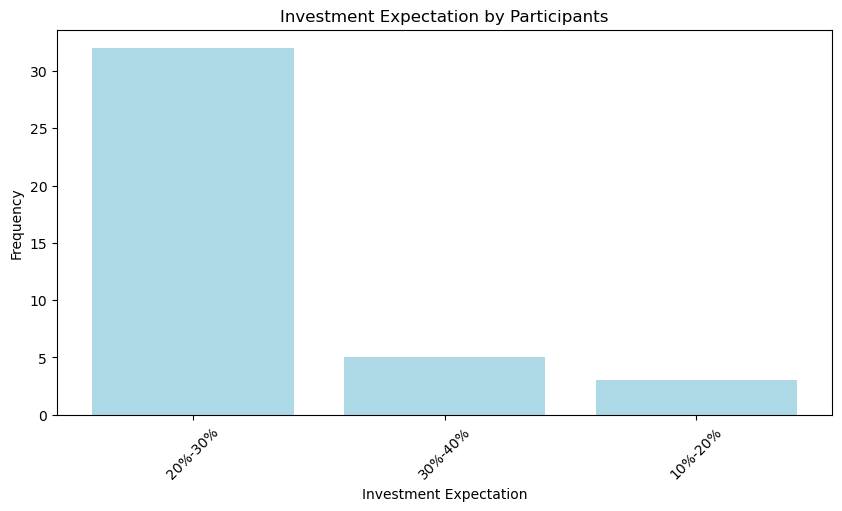

In [11]:
# Analyzing expectation from investment.  

inv_exp = data['Expect'].value_counts()
print(inv_exp)
plt.figure(figsize=(10,5))
plt.bar(inv_exp.index, inv_exp.values, color='lightblue')
plt.xlabel("Investment Expectation")
plt.ylabel("Frequency")
plt.title("Investment Expectation by Participants")
plt.xticks(rotation=45)
plt.show()


Correlation Matrix:
                               age  Investment_Duration  \
age                       1.000000             0.051756   
Investment_Duration       0.051756             1.000000   
Expected_Returns_Numeric -0.089606             0.258223   

                          Expected_Returns_Numeric  
age                                      -0.089606  
Investment_Duration                       0.258223  
Expected_Returns_Numeric                  1.000000  


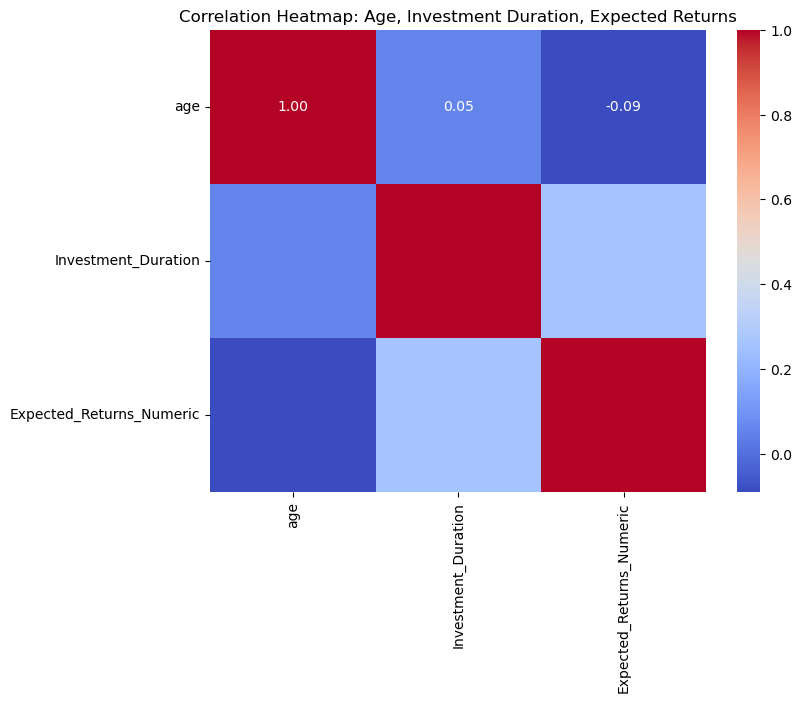

In [12]:
# Correlation Analysis

#mapping investment duration to numeric values (average)
duration_mapping = {
    "Less than 1 year": 0.5,
    "1-3 years": 2,
    "3-5 years": 4,
    "More than 5 years": 6
}

data["Investment_Duration"] = data["Duration"].map(duration_mapping)

# Function to convert percentage ranges to numeric values
def convert_percentage_to_numeric(value):
    numbers = re.findall(r'\d+', value)  # Extract numeric values
    if len(numbers) == 2:  
        return (float(numbers[0]) + float(numbers[1])) / 2  # Compute midpoint
    elif len(numbers) == 1:
        return float(numbers[0])  # If only one number, return it as a float
    else:
        return None  # Handle unexpected cases

# Apply conversion to the DataFrame
data["Expected_Returns_Numeric"] = data["Expect"].apply(convert_percentage_to_numeric)

# Step 2: Compute Correlation Matrix
correlation_matrix = data[['age', 'Investment_Duration', 'Expected_Returns_Numeric']].corr()

# Step 3: Print Correlation Coefficients
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Step 4: Visualize Correlation with Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Age, Investment Duration, Expected Returns")
plt.show()